##グラフ彩色問題
n色の中から1色選んで全てのノードを塗り、かつエッジで接続されているノード間は異なる色となる時の塗り方を選びます。１項目は各ノード１色に制限する制約項、２項目はエッジで接続されているノード間は異なる色となる条件です。コスト関数は、

$$H = \sum_v\left(1 - \sum_{i=1}^n x_{v,i} \right)^2 + B\sum_{(u,v)\in E}\sum_{i=1}^n　x_{u,i} x_{v,i}$$

##例題
６つのエリアを４色で塗り分ける問題を想定します。

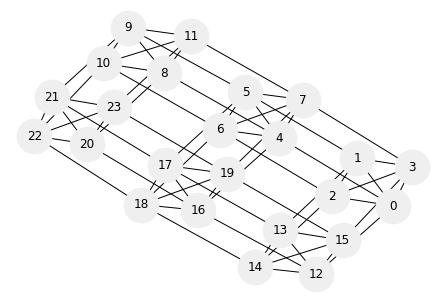

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

options = {'node_color': '#efefef','node_size': 1200,'with_labels':'True'}

G = nx.Graph()
G.add_nodes_from(nx.path_graph(24))
G.add_edges_from([(0,1),(0,2),(0,3),(1,2),(1,3),(2,3) , (4,5),(4,6),(4,7),(5,6),(5,7),(6,7) , (8,9),(8,10),(8,11),(9,10),(9,11),(10,11) , (12,13),(12,14),(12,15),(13,14),(13,15),(14,15) , (16,17),(16,18),(16,19),(17,18),(17,19),(18,19) , (20,21),(20,22),(20,23),(21,22),(21,23),(22,23) , (0,4),(1,5),(2,6),(3,7) , (4,8),(5,9),(6,10),(7,11) , (12,16),(13,17),(14,18),(15,19) , (16,20),(17,21),(18,22),(19,23) , (0,12),(1,13),(2,14),(3,15) , (4,16),(5,17),(6,18),(7,19) , (8,20),(9,21),(10,22),(11,23)])
nx.draw(G, **options)

上記のように4ノードごとに完全結合のグループを作り、隣接するグループとの間で対応するノード間に結合を作ります。グループ内の4ノードは4色を表し、1グループ内では1量子ビットだけ1になり、あとは0になるように問題を設定します。また、グループ間では色を塗り分ける必要がありますので、同じ色が来ないように値をセットします。

##1項目を計算する
1項目は各ノード内で1量子ビットだけが1になる制約条件です。
これはさらに6つのグループの条件を足し合わせる必要があります。

In [2]:
!pip install blueqat

     |████████████████████████████████| 51kB 2.4MB/s 


In [0]:
import blueqat.opt as wq
import numpy as np
a = wq.opt()

まず6つのグループを作り、それぞれのグループ内の量子ビットの局所磁場を1にします。

In [4]:
group = []

for i in range(6):
  group.append(np.zeros(24))
  for j in range(i*4,i*4+4):
    group[i][j] = 1
print(group)

[array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1.])]


次に、1-2A+A^2の形を計算してみます。定数項の1は無視して-2A+A^2のところだけ計算します。wildqatの機能を一部利用します。

In [5]:
matrix1 = np.zeros((24,24))

for i in range(6):
  matrix1 += -2 * np.diag(group[i]) + wq.sqr(group[i])

print(matrix1)

[[-1.  2.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2.  2.  2.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2.  2.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.

ちょっと大きめの行列になってしまいましたが、確認のために一旦これをQUBOとして計算してみて、書くグループ内の量子ビットが1つだけ1になっているか確認してみます。

In [6]:
a.qubo = matrix1
b = a.sa()
print(np.asarray(b).reshape((6,4)))

[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]]


便宜的にグループごとに分けてみました。確かに1グループの中で1つだけ量子ビットが1になっているのが確認できました。ただ、これだけでは全ての条件を満たしていません。たとえば、1番目のグループと2番目のグループの1の位置が同じになっています。これでは隣接グループが同じ色になっているとなり、塗り分けができていませんので、隣接グループ同士の同じ色を繋いでその間に値をセットします。

##隣接するグループ同士の同じ色を選ばせない
ここでも少し工夫してWildqatの機能を使ってみます。エッジを指定することで勝手にQUBOを作ってくれる機能があります。これをつかってみます。

In [7]:
Xarr = [[0,4],[1,5],[2,6],[3,7] , [4,8],[5,9],[6,10],[7,11] , [12,16],[13,17],[14,18],[15,19] , [16,20],[17,21],[18,22],[19,23] , [0,12],[1,13],[2,14],[3,15] , [4,16],[5,17],[6,18],[7,19] , [8,20],[9,21],[10,22],[11,23]]
matrix2 = wq.net(Xarr,24)
print(matrix2)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.

最終的にはmatrix1とmatrix2を足し合わせてQUBOをつくります。

In [9]:
B  = 1
a.qubo = matrix1 + B*matrix2
b = a.sa()
print(np.asarray(b).reshape((6,4)))

[[0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]]


上記のように今度はグループ間で繋がっているところは同じ色ならないようにずれています。上から3番目と4番目は同じ位置にあるように見えますが、3番目のグループと4番目のグループはつながっていないので大丈夫です。

念のためコスト関数の変遷を見てみます。

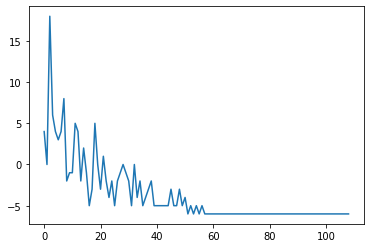

In [10]:
a.plot()


とても綺麗に下がっているのが確認できます。
以上です。